In [2]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import matplotlib.image as  mpimg

Important note when importing rgb and depth images:
 depth and color images should be aligned and in the same image size. 

Text(0.5, 1.0, 'Depth Image')

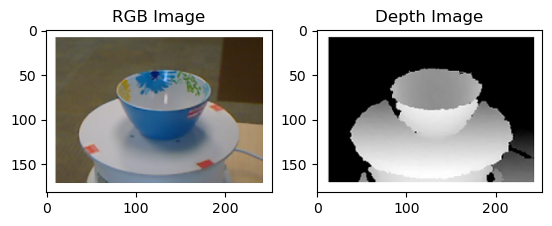

In [3]:
cup_rgb = o3d.io.read_image("importing_data/cup_rgb.png")
cup_depth = o3d.io.read_image("importing_data/cup_depth.png")

plt.subplot(1,2,1)
plt.imshow(cup_rgb)
plt.title("RGB Image")

plt.subplot(1,2,2)
plt.imshow(cup_depth)
plt.title("Depth Image")

In [4]:
# create an rgbd image object:
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(cup_rgb, cup_depth, convert_rgb_to_intensity=False)


# use the rgbd image to create point cloud:
pointcld = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image,
           o3d.camera.PinholeCameraIntrinsic(
           o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))

# visualize:
o3d.visualization.draw_geometries([pointcld])

The created point cloud can be saved in .ply format: [Polygon File Format](http://paulbourke.net/dataformats/ply/) for later use.

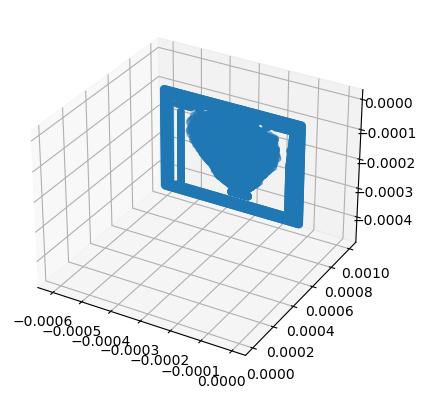

In [17]:
pointcld_ply = o3d.io.write_point_cloud("pointcld_ply.ply", pointcld)

# read .ply file and convert it to a numpy array
pointcld_o3d = o3d.io.read_point_cloud("pointcld_ply.ply")
pointcld_np = np.asarray(pointcld_o3d.points)

#plotting 
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(pointcld_np[:, 0], pointcld_np[:, 2], pointcld_np[:, 1])
plt.show()